# Laboratorium 1
Autorzy: Krzysztof Zalewa 273032, Michał Pakuła 272828 \
Data: 24 Marca 2025 
### Ćwiczenie 1
Celem ćwiczenia było: 

1. Napisanie skryptu w Pythonie umożliwiającego wczytywanie i wizualizację badanych sygnałów. 
   * ekg1.txt – 12 kolumn odpowiada odprowadzeniom, fs = 1000 Hz
   * ekg100.txt – 1 kolumna, fs = 360 Hz
   * ekg_noise.txt – 1 kolumna: czas, 2 kolumna: wartości amplitud EKG, fs = 360 Hz

2. Umożliwienie obserwacji wycinka sygnału

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [22]:
# Ładowanie wybranego pliku
def loadFile(file_name):
    file_path = "./src/"+file_name

    return pd.read_csv(file_path,sep="\\s+",header=None,engine="python")


Po załadowaniu pliku .txt są trzy możliwości

1. Plik ma 12 kolumn z danymi
2. Plik ma 2 kolumny z danymi
3. Plik ma 1 kolumnę z danymi


In [23]:
# Sprawdź liczbę kolumn
def displayEKG(data_frame,start,end):
    num_rows = len(data_frame)
    tick_rate = 72000
    if start == "":
        start = 0
    if end == "":
        end = num_rows

    x = list(range(int( start ),int( end ))) 
    new_data = data_frame.iloc[int( start ):int( end )].copy()
    font = {'size':20}
    num_rows = len(new_data)
    minutes = num_rows/tick_rate
    x_labels = np.linspace(0,minutes,int( minutes ))

    if len( data_frame.columns ) == 12:
        column_names = ['I','II','III','aVL','aVR','aVF','V_1','V_2','V_3','V_4','V_5','V_6']  
        new_data.columns = column_names
        plt.figure(figsize=(50,15))
        j=0
        for i in range(1,12,2):
            plt.subplot(6,2,i)
            plt.plot(x,new_data[column_names[j]])
            plt.grid(True)
            plt.xticks(ticks=x_labels*tick_rate,labels=x_labels)
            plt.title(column_names[j],fontdict=font)
            j += 1
        for i in range(2,13,2):
            plt.subplot(6,2,i)
            plt.plot(x,new_data[column_names[j]])
            plt.xticks(ticks=x_labels*tick_rate,labels=x_labels)
            plt.grid(True) 
            plt.title(column_names[j],fontdict=font) 
            j += 1        
        plt.tight_layout()
        plt.show()

    if len(new_data.columns) == 1:
        new_data.columns = ['data']
        font = {'size':20}
        plt.figure(figsize=(20,5))
        plt.plot(x,new_data['data'])
        plt.xticks(ticks=x_labels*tick_rate,labels=x_labels)
        plt.grid(True)
        plt.title("EKG")
        plt.show()

    if len(new_data.columns) == 2:
        new_data.columns = ['I','data']
        font = {'size':20}
        plt.figure(figsize=(20,5))
        plt.plot(x,new_data['data'])
        plt.xticks(ticks=x_labels*tick_rate,labels=x_labels)
        plt.grid(True)
        plt.title("EKG")
    

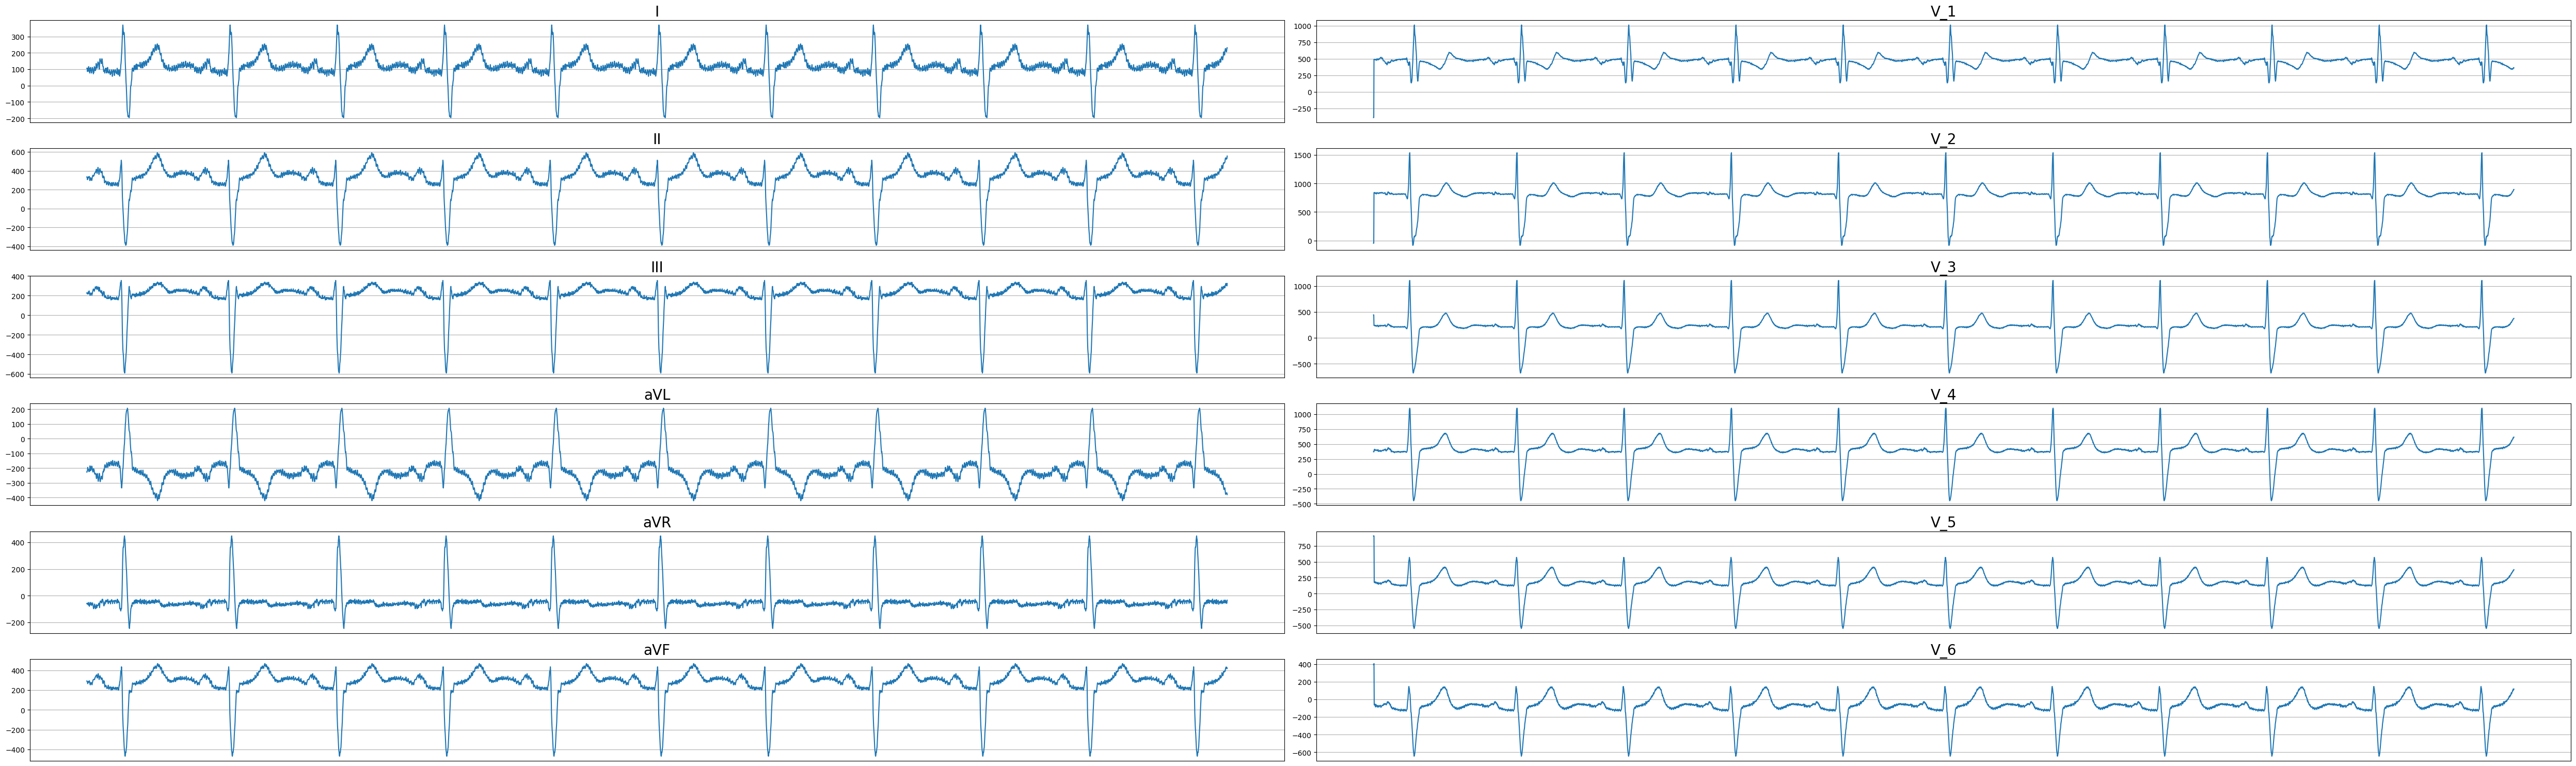

In [25]:
data_frame = loadFile(input("Podaj nazwe pliku z danymi: "))
start = input("Początek zakresu(Minimalnie 0): ")
num_rows = len(data_frame)
end = input("Koniec zakresu(Maksymalnie "+str( num_rows )+"): ")
displayEKG(data_frame,start,end)

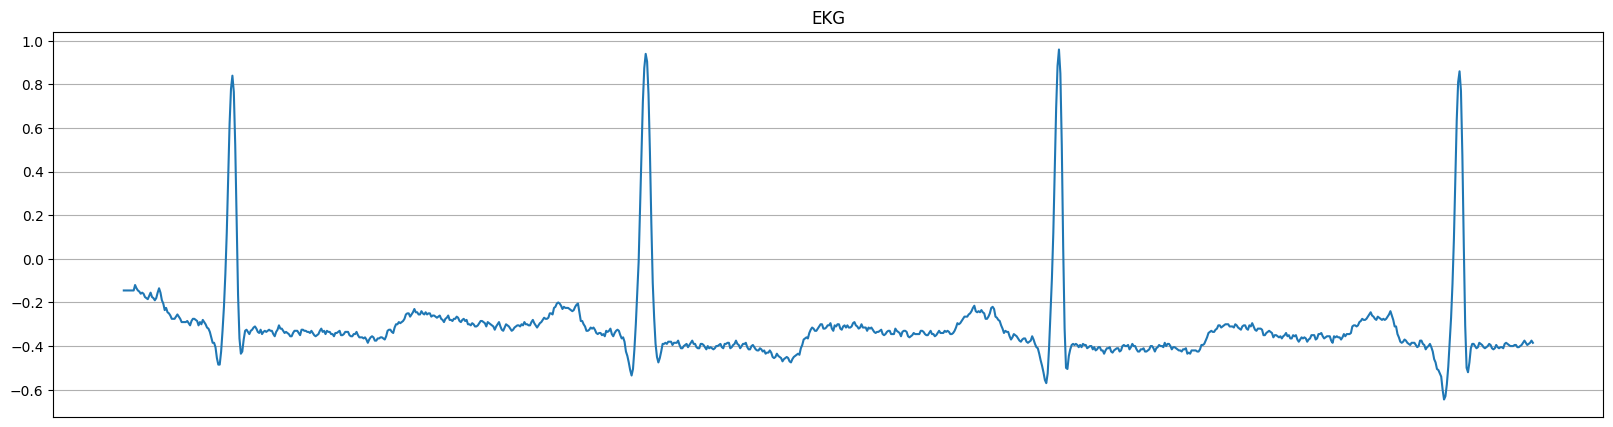

In [ ]:
data_frame = loadFile("ekg100.txt")
displayEKG(data_frame,0,1000)

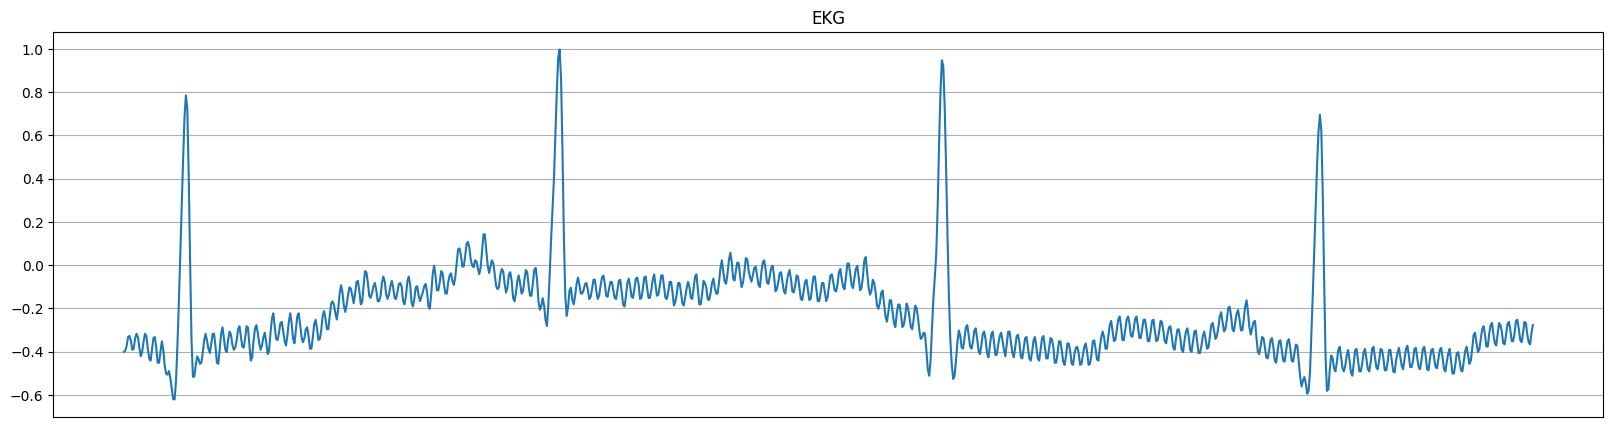

In [26]:
data_frame = loadFile("ekg_noise.txt")
displayEKG(data_frame,100,1100)

Sygnały zapisane w plikach ekg_noise.txt oraz ekg100.txt zostały ograniczone do 1000 próbek. W przypadku próby wyświetlenia całego sygnału ootrzymany obraz jest nie czytelny.